In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import DistanceMetric
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from keras.optimizers import Adam

In [3]:
df=pd.read_csv('C:\\Users\\hp\\Desktop\\Kaggle\\Customer churn project\\data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors='coerce')

In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(7032, 21)

In [11]:
df.drop(['customerID'],axis='columns',inplace=True)

In [12]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [13]:
df_churn=df[df.Churn=='Yes']
df_retained=df[df.Churn=='No']

In [14]:
len(df_churn)

1869

In [15]:
len(df_retained)

5163

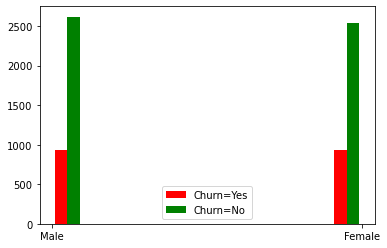

In [16]:
plt.hist([df_churn.gender,df_retained.gender],color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.show()

In [17]:
df_male=df[df.gender=='Male']
df_female=df[df.gender=='Female']

In [18]:
df_male_churn=df_male[df_male.Churn=='Yes']
df_male_not_churn=df_male[df_male.Churn=='No']
df_female_churn=df_female[df_female.Churn=='Yes']
df_female_not_churn=df_female[df_female.Churn=='No']

In [19]:
df_male

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,Male,0,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7035,Male,0,No,No,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


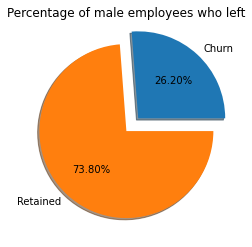

In [20]:
plt.pie([len(df_male_churn),len(df_male_not_churn)],labels=['Churn','Retained'],radius=1,
       autopct='%0.2f%%',shadow=True,explode=[0.2,0])
plt.title('Percentage of male employees who left')
plt.show()


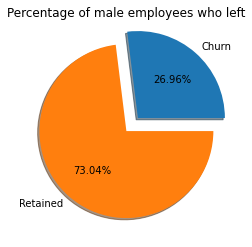

In [21]:
plt.pie([len(df_female_churn),len(df_female_not_churn)],labels=['Churn','Retained'],radius=1,
       autopct='%0.2f%%',shadow=True,explode=[0.2,0])
plt.title('Percentage of male employees who left')
plt.show()


## From the above charts it seems that gender does not play any role in an employee's exit

In [22]:
df.drop(['gender'],axis='columns',inplace=True)
df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


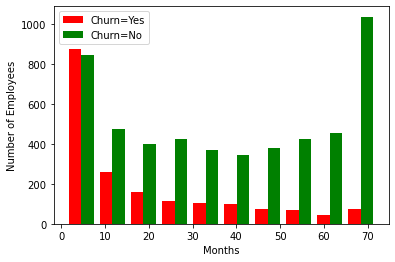

In [23]:
plt.hist([df_churn.tenure,df_retained.tenure],color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.xlabel('Months')
plt.ylabel('Number of Employees')
plt.legend()
plt.show()

<AxesSubplot:xlabel='tenure', ylabel='Density'>

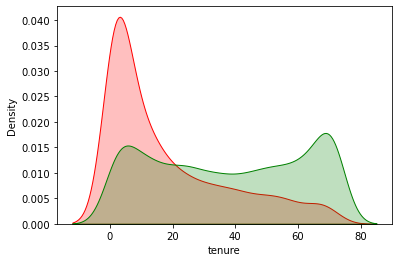

In [24]:
sn.kdeplot(df_churn.tenure,shade=True,color='red')
sn.kdeplot(df_retained.tenure,shade=True,color='green')

## We can observe that if employee is settled in the company for a considerable amount of months,it is less likely that he/she would leave


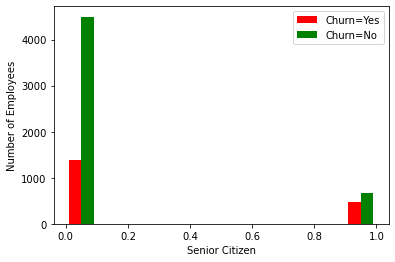

In [25]:
plt.hist([df_churn.SeniorCitizen,df_retained.SeniorCitizen],color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.xlabel('Senior Citizen')
plt.ylabel('Number of Employees')
plt.legend()
plt.show()

In [26]:
df_senior_citizen=df[df.SeniorCitizen==1]
df_not_senior_citizen=df[df.SeniorCitizen==0]

In [27]:
df_senior_citizen

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
30,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
31,1,Yes,No,2,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
34,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
50,1,No,No,43,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1,Yes,No,63,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No
7029,1,No,No,6,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7031,1,Yes,No,55,Yes,Yes,DSL,Yes,Yes,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.10,No
7032,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


In [28]:
df_senior_citizen_churn=df_senior_citizen[df_senior_citizen.Churn=='Yes']
df_senior_citizen_not_churn=df_senior_citizen[df_senior_citizen.Churn=='No']

In [29]:
df_not_senior_citizen_churn=df_not_senior_citizen[df_not_senior_citizen.Churn=='Yes']
df_not_senior_citizen_not_churn=df_not_senior_citizen[df_not_senior_citizen.Churn=='No']

In [30]:
df_senior_citizen_churn

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
53,1,Yes,No,8,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),80.65,633.30,Yes
55,1,No,No,18,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
99,1,Yes,No,25,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.50,2514.50,Yes
113,1,Yes,No,37,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.50,2868.15,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6993,1,Yes,No,50,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,88.05,4367.35,Yes
7008,1,No,No,3,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.05,256.25,Yes
7010,1,Yes,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.45,74.45,Yes
7032,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


In [31]:
df_not_senior_citizen_churn

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7011,0,No,No,4,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,Yes,Mailed check,60.40,272.15,Yes
7018,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes
7021,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes


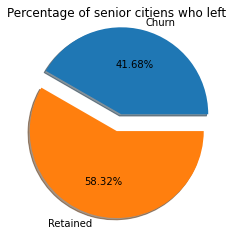

In [32]:
plt.pie([len(df_senior_citizen_churn),len(df_senior_citizen_not_churn)],labels=['Churn','Retained'],radius=1,
       autopct='%0.2f%%',shadow=True,explode=[0.2,0])
plt.title('Percentage of senior citiens who left')
plt.show()


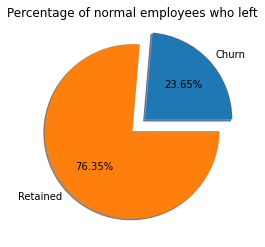

In [33]:
plt.pie([len(df_not_senior_citizen_churn),len(df_not_senior_citizen_not_churn)],labels=['Churn','Retained'],radius=1,
       autopct='%0.2f%%',shadow=True,explode=[0.2,0])
plt.title('Percentage of normal employees who left')
plt.show()


## It can be observed that senior citizens are more likely to leave

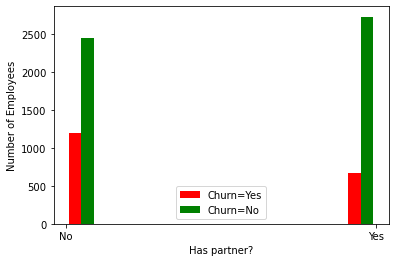

In [34]:
plt.hist([df_churn.Partner,df_retained.Partner],color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.xlabel('Has partner?')
plt.ylabel('Number of Employees')
plt.legend()
plt.show()

In [35]:
df_partner=df[df.Partner=='Yes']
df_no_partner=df[df.Partner=='No']

In [36]:
df_partner_churn=df_partner[df_partner.Churn=='Yes']
df_partner_not_churn=df_partner[df_partner.Churn=='No']
df_no_partner_churn=df_no_partner[df_no_partner.Churn=='Yes']
df_no_partner_not_churn=df_no_partner[df_no_partner.Churn=='No']

In [37]:
len(df_partner_churn)

669

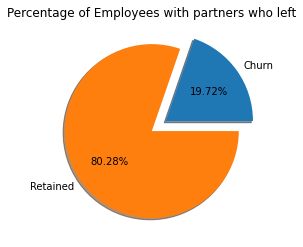

In [38]:
plt.pie([len(df_partner_churn),len(df_partner_not_churn)],labels=['Churn','Retained'],radius=1,
       autopct='%0.2f%%',shadow=True,explode=[0.2,0])
plt.title('Percentage of Employees with partners who left')
plt.show()

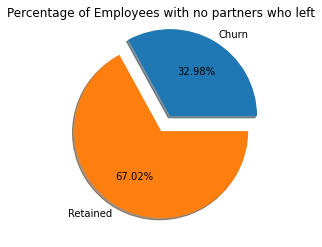

In [39]:
plt.pie([len(df_no_partner_churn),len(df_no_partner_not_churn)],labels=['Churn','Retained'],radius=1,
       autopct='%0.2f%%',shadow=True,explode=[0.2,0])
plt.title('Percentage of Employees with no partners who left')
plt.show()

## It can be observed that employees who don't have partners are slightly more likely to leave

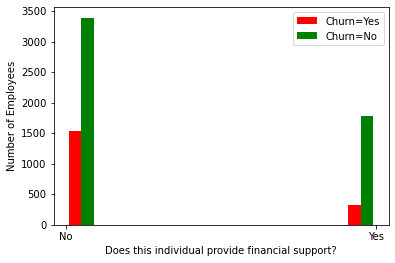

In [40]:
plt.hist([df_churn.Dependents,df_retained.Dependents],color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.xlabel('Does this individual provide financial support?')
plt.ylabel('Number of Employees')
plt.legend()
plt.show()

In [41]:
df_Dependents=df[df.Dependents=='Yes']
df_no_Dependents=df[df.Dependents=='No']

In [42]:
df_Dependents_churn=df_Dependents[df_Dependents.Churn=='Yes']
df_Dependents_not_churn=df_Dependents[df_Dependents.Churn=='No']
df_no_Dependents_churn=df_no_Dependents[df_no_Dependents.Churn=='Yes']
df_no_Dependents_not_churn=df_no_Dependents[df_no_Dependents.Churn=='No']

In [43]:
len(df_Dependents_churn)

326

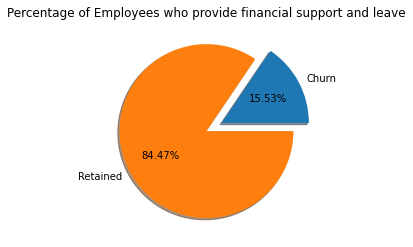

In [44]:
plt.pie([len(df_Dependents_churn),len(df_Dependents_not_churn)],labels=['Churn','Retained'],radius=1,
       autopct='%0.2f%%',shadow=True,explode=[0.2,0])
plt.title('Percentage of Employees who provide financial support and leave')
plt.show()

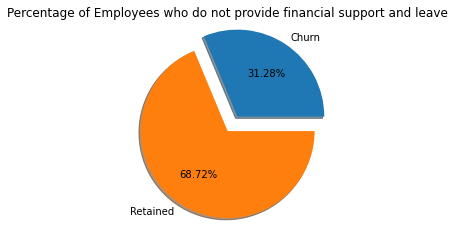

In [45]:
plt.pie([len(df_no_Dependents_churn),len(df_no_Dependents_not_churn)],labels=['Churn','Retained'],radius=1,
       autopct='%0.2f%%',shadow=True,explode=[0.2,0])
plt.title('Percentage of Employees who do not provide financial support and leave')
plt.show()

# It can be observed that individuals who provide financial support are less likely to leave


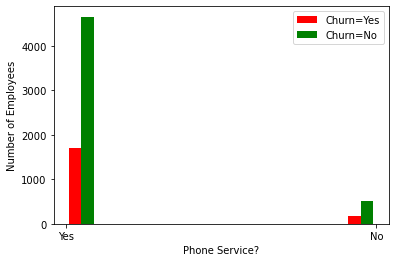

In [46]:
plt.hist([df_churn.PhoneService,df_retained.PhoneService],color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.xlabel('Phone Service?')
plt.ylabel('Number of Employees')
plt.legend()
plt.show()

In [47]:
df_PhoneService=df[df.PhoneService=='Yes']
df_no_PhoneService=df[df.PhoneService=='No']

In [48]:
df_PhoneService_churn=df_PhoneService[df_PhoneService.Churn=='Yes']
df_PhoneService_not_churn=df_PhoneService[df_PhoneService.Churn=='No']
df_no_PhoneService_churn=df_no_PhoneService[df_no_PhoneService.Churn=='Yes']
df_no_PhoneService_not_churn=df_no_PhoneService[df_no_PhoneService.Churn=='No']

In [49]:
len(df_PhoneService_churn)

1699

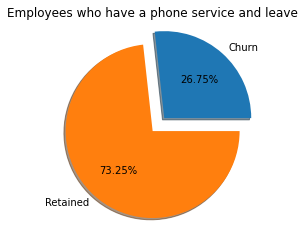

In [50]:
plt.pie([len(df_PhoneService_churn),len(df_PhoneService_not_churn)],labels=['Churn','Retained'],radius=1,
       autopct='%0.2f%%',shadow=True,explode=[0.2,0])
plt.title('Employees who have a phone service and leave')
plt.show()

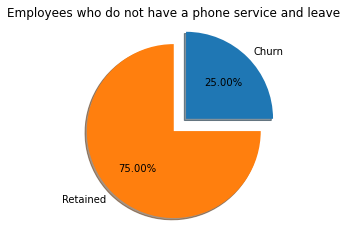

In [51]:
plt.pie([len(df_no_PhoneService_churn),len(df_no_PhoneService_not_churn)],labels=['Churn','Retained'],radius=1,
       autopct='%0.2f%%',shadow=True,explode=[0.2,0])
plt.title('Employees who do not have a phone service and leave')
plt.show()

In [52]:
df.drop(['PhoneService'],axis='columns',inplace=True)

## Seems like having or not having a phone service does not affect much

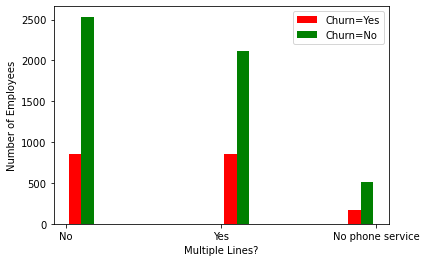

In [53]:
plt.hist([df_churn.MultipleLines,df_retained.MultipleLines],color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.xlabel('Multiple Lines?')
plt.ylabel('Number of Employees')
plt.legend()
plt.show()

In [54]:
df.drop(['MultipleLines'],axis='columns',inplace=True)

In [55]:
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

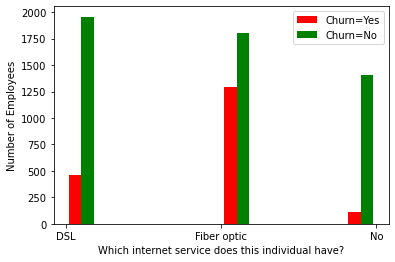

In [56]:
plt.hist([df_churn.InternetService,df_retained.InternetService],color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.xlabel('Which internet service does this individual have?')
plt.ylabel('Number of Employees')
plt.legend()
plt.show()

## Clear from the graph that the employees with Fibre Optic Internet Service are more likely to leave

In [57]:
df

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,0,Yes,Yes,72,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,0,Yes,Yes,11,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,1,Yes,No,4,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


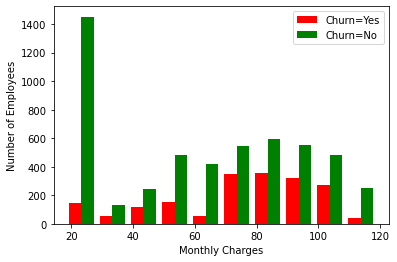

In [58]:
plt.hist([df_churn.MonthlyCharges,df_retained.MonthlyCharges],color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Employees')
plt.legend()
plt.show()

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

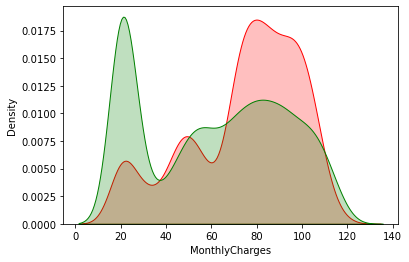

In [59]:
sn.kdeplot(df_churn.MonthlyCharges,shade=True,color='red')
sn.kdeplot(df_retained.MonthlyCharges,shade=True,color='green')

## Clear from plot that the employees with more monthly charges are more likely to leave 

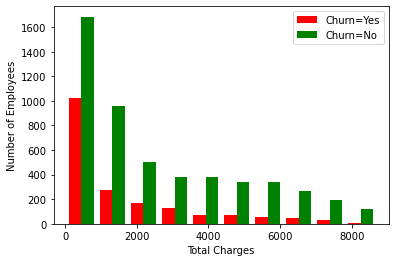

In [60]:
plt.hist([df_churn.TotalCharges,df_retained.TotalCharges],color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.xlabel('Total Charges')
plt.ylabel('Number of Employees')
plt.legend()
plt.show()

## No conclusion can be drawn from total charges column as tenures of different employees are different

In [61]:
df.drop(['TotalCharges'],axis='columns',inplace=True)

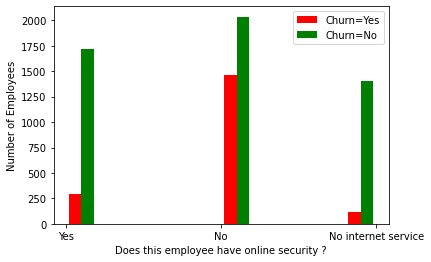

In [62]:
plt.hist([df_churn.OnlineSecurity,df_retained.OnlineSecurity],color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.xlabel('Does this employee have online security ?')
plt.ylabel('Number of Employees')
plt.legend()
plt.show()

In [63]:
df_OnlineSecurity=df[df.OnlineSecurity=='Yes']
df_no_OnlineSecurity=df[df.OnlineSecurity=='No']

In [64]:
df_OnlineSecurity_churn=df_OnlineSecurity[df_OnlineSecurity.Churn=='Yes']
df_OnlineSecurity_not_churn=df_OnlineSecurity[df_OnlineSecurity.Churn=='No']
df_no_OnlineSecurity_churn=df_no_OnlineSecurity[df_no_OnlineSecurity.Churn=='Yes']
df_no_OnlineSecurity_not_churn=df_no_OnlineSecurity[df_no_OnlineSecurity.Churn=='No']

In [65]:
len(df_OnlineSecurity_churn)

295

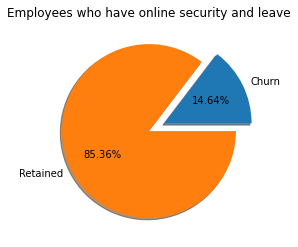

In [66]:
plt.pie([len(df_OnlineSecurity_churn),len(df_OnlineSecurity_not_churn)],labels=['Churn','Retained'],radius=1,
       autopct='%0.2f%%',shadow=True,explode=[0.2,0])
plt.title('Employees who have online security and leave')
plt.show()

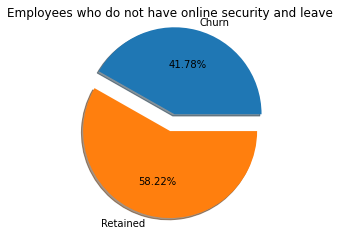

In [67]:
plt.pie([len(df_no_OnlineSecurity_churn),len(df_no_OnlineSecurity_not_churn)],labels=['Churn','Retained'],radius=1,
       autopct='%0.2f%%',shadow=True,explode=[0.2,0])
plt.title('Employees who do not have online security and leave')
plt.show()

## Clear from the above figures that people with no online security are more likely to leave

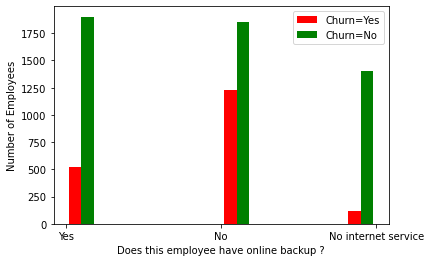

In [68]:
plt.hist([df_churn.OnlineBackup,df_retained.OnlineBackup],color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.xlabel('Does this employee have online backup ?')
plt.ylabel('Number of Employees')
plt.legend()
plt.show()

In [69]:
df_OnlineBackup=df[df.OnlineBackup=='Yes']
df_no_OnlineBackup=df[df.OnlineBackup=='No']

In [70]:
df_OnlineBackup_churn=df_OnlineBackup[df_OnlineBackup.Churn=='Yes']
df_OnlineBackup_not_churn=df_OnlineBackup[df_OnlineBackup.Churn=='No']
df_no_OnlineBackup_churn=df_no_OnlineBackup[df_no_OnlineBackup.Churn=='Yes']
df_no_OnlineBackup_not_churn=df_no_OnlineBackup[df_no_OnlineBackup.Churn=='No']

In [71]:
len(df_OnlineBackup_churn)

523

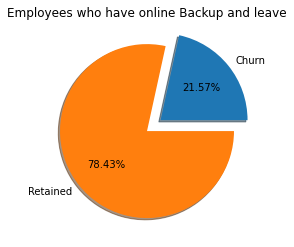

In [72]:
plt.pie([len(df_OnlineBackup_churn),len(df_OnlineBackup_not_churn)],labels=['Churn','Retained'],radius=1,
       autopct='%0.2f%%',shadow=True,explode=[0.2,0])
plt.title('Employees who have online Backup and leave')
plt.show()

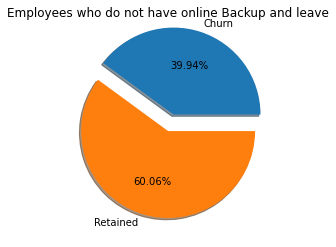

In [73]:
plt.pie([len(df_no_OnlineBackup_churn),len(df_no_OnlineBackup_not_churn)],labels=['Churn','Retained'],radius=1,
       autopct='%0.2f%%',shadow=True,explode=[0.2,0])
plt.title('Employees who do not have online Backup and leave')
plt.show()

## Similarly employees with no online backup more likely to leave

In [74]:
df.DeviceProtection.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

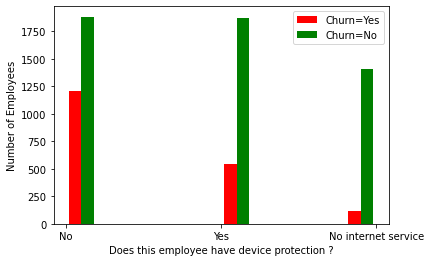

In [75]:
plt.hist([df_churn.DeviceProtection,df_retained.DeviceProtection],color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.xlabel('Does this employee have device protection ?')
plt.ylabel('Number of Employees')
plt.legend()
plt.show()

In [76]:
df_DeviceProtection=df[df.DeviceProtection=='Yes']
df_no_DeviceProtection=df[df.DeviceProtection=='No']

In [77]:
df_DeviceProtection_churn=df_DeviceProtection[df_DeviceProtection.Churn=='Yes']
df_DeviceProtection_not_churn=df_DeviceProtection[df_DeviceProtection.Churn=='No']
df_no_DeviceProtection_churn=df_no_DeviceProtection[df_no_DeviceProtection.Churn=='Yes']
df_no_DeviceProtection_not_churn=df_no_DeviceProtection[df_no_DeviceProtection.Churn=='No']

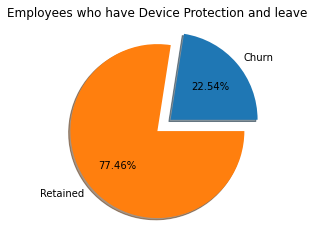

In [78]:
plt.pie([len(df_DeviceProtection_churn),len(df_DeviceProtection_not_churn)],labels=['Churn','Retained'],radius=1,
       autopct='%0.2f%%',shadow=True,explode=[0.2,0])
plt.title('Employees who have Device Protection and leave')
plt.show()

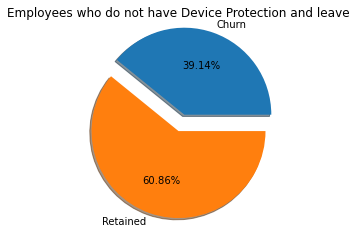

In [79]:
plt.pie([len(df_no_DeviceProtection_churn),len(df_no_DeviceProtection_not_churn)],labels=['Churn','Retained'],radius=1,
       autopct='%0.2f%%',shadow=True,explode=[0.2,0])
plt.title('Employees who do not have Device Protection and leave')
plt.show()

## Employees with no Device protection more likely to leave

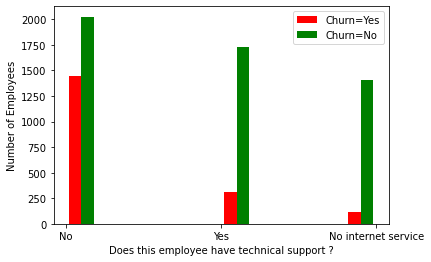

In [80]:
plt.hist([df_churn.TechSupport,df_retained.TechSupport],color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.xlabel('Does this employee have technical support ?')
plt.ylabel('Number of Employees')
plt.legend()
plt.show()

In [81]:
df_TechSupport=df[df.TechSupport=='Yes']
df_no_TechSupport=df[df.TechSupport=='No']

In [82]:
df_TechSupport_churn=df_TechSupport[df_TechSupport.Churn=='Yes']
df_TechSupport_not_churn=df_TechSupport[df_TechSupport.Churn=='No']
df_no_TechSupport_churn=df_no_TechSupport[df_no_TechSupport.Churn=='Yes']
df_no_TechSupport_not_churn=df_no_TechSupport[df_no_TechSupport.Churn=='No']

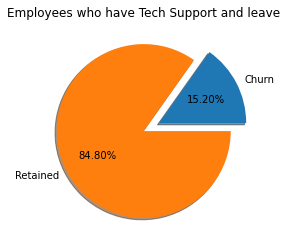

In [83]:
plt.pie([len(df_TechSupport_churn),len(df_TechSupport_not_churn)],labels=['Churn','Retained'],radius=1,
       autopct='%0.2f%%',shadow=True,explode=[0.2,0])
plt.title('Employees who have Tech Support and leave')
plt.show()

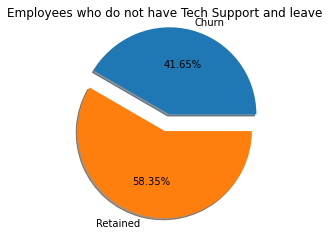

In [84]:
plt.pie([len(df_no_TechSupport_churn),len(df_no_TechSupport_not_churn)],labels=['Churn','Retained'],radius=1,
       autopct='%0.2f%%',shadow=True,explode=[0.2,0])
plt.title('Employees who do not have Tech Support and leave')
plt.show()

In [85]:
df

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,0,No,No,34,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,0,No,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,0,No,No,45,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,0,No,No,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,No
7039,0,Yes,Yes,72,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,No
7040,0,Yes,Yes,11,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,No
7041,1,Yes,No,4,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,Yes


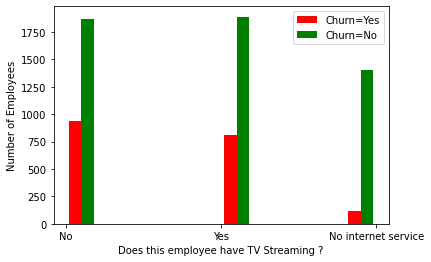

In [86]:
plt.hist([df_churn.StreamingTV,df_retained.StreamingTV],color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.xlabel('Does this employee have TV Streaming ?')
plt.ylabel('Number of Employees')
plt.legend()
plt.show()

In [87]:
df_StreamingTV=df[df.StreamingTV=='Yes']
df_no_StreamingTV=df[df.StreamingTV=='No']

In [88]:
df_StreamingTV_churn=df_StreamingTV[df_StreamingTV.Churn=='Yes']
df_StreamingTV_not_churn=df_StreamingTV[df_StreamingTV.Churn=='No']
df_no_StreamingTV_churn=df_no_StreamingTV[df_no_StreamingTV.Churn=='Yes']
df_no_StreamingTV_not_churn=df_no_StreamingTV[df_no_StreamingTV.Churn=='No']

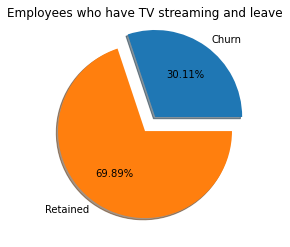

In [89]:
plt.pie([len(df_StreamingTV_churn),len(df_StreamingTV_not_churn)],labels=['Churn','Retained'],radius=1,
       autopct='%0.2f%%',shadow=True,explode=[0.2,0])
plt.title('Employees who have TV streaming and leave')
plt.show()

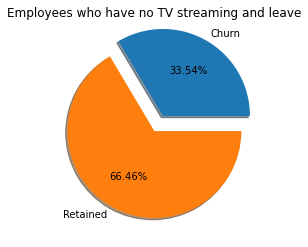

In [90]:
plt.pie([len(df_no_StreamingTV_churn),len(df_no_StreamingTV_not_churn)],labels=['Churn','Retained'],radius=1,
       autopct='%0.2f%%',shadow=True,explode=[0.2,0])
plt.title('Employees who have no TV streaming and leave')
plt.show()

## Numbers are pretty similar, so TV streaming does not affect a customer's churn

In [91]:
df.drop(['StreamingTV'],axis='columns',inplace=True)

In [92]:
df

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,DSL,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,0,No,No,34,DSL,Yes,No,Yes,No,No,One year,No,Mailed check,56.95,No
2,0,No,No,2,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,0,No,No,45,DSL,Yes,No,Yes,Yes,No,One year,No,Bank transfer (automatic),42.30,No
4,0,No,No,2,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,DSL,Yes,No,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,No
7039,0,Yes,Yes,72,Fiber optic,No,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),103.20,No
7040,0,Yes,Yes,11,DSL,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,No
7041,1,Yes,No,4,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,Yes


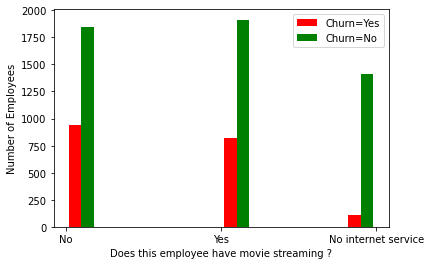

In [93]:
plt.hist([df_churn.StreamingMovies,df_retained.StreamingMovies],color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.xlabel('Does this employee have movie streaming ?')
plt.ylabel('Number of Employees')
plt.legend()
plt.show()

In [94]:
df_StreamingMovies=df[df.StreamingMovies=='Yes']
df_no_StreamingMovies=df[df.StreamingMovies=='No']

In [95]:
df_StreamingMovies_churn=df_StreamingMovies[df_StreamingMovies.Churn=='Yes']
df_StreamingMovies_not_churn=df_StreamingMovies[df_StreamingMovies.Churn=='No']
df_no_StreamingMovies_churn=df_no_StreamingMovies[df_no_StreamingMovies.Churn=='Yes']
df_no_StreamingMovies_not_churn=df_no_StreamingMovies[df_no_StreamingMovies.Churn=='No']

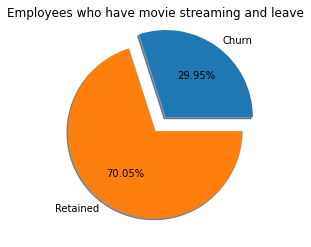

In [96]:
plt.pie([len(df_StreamingMovies_churn),len(df_StreamingMovies_not_churn)],labels=['Churn','Retained'],radius=1,
       autopct='%0.2f%%',shadow=True,explode=[0.2,0])
plt.title('Employees who have movie streaming and leave')
plt.show()

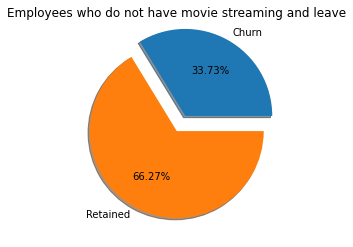

In [97]:
plt.pie([len(df_no_StreamingMovies_churn),len(df_no_StreamingMovies_not_churn)],labels=['Churn','Retained'],radius=1,
       autopct='%0.2f%%',shadow=True,explode=[0.2,0])
plt.title('Employees who do not have movie streaming and leave')
plt.show()

## Numbers are again pretty similar and have only about 3.7% difference, hence movie streaming also do not affect a customer's churn

In [98]:
df.drop(['StreamingMovies'],axis='columns',inplace=True)
df

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,0,No,No,34,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,No
2,0,No,No,2,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,0,No,No,45,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,No
4,0,No,No,2,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,DSL,Yes,No,Yes,Yes,One year,Yes,Mailed check,84.80,No
7039,0,Yes,Yes,72,Fiber optic,No,Yes,Yes,No,One year,Yes,Credit card (automatic),103.20,No
7040,0,Yes,Yes,11,DSL,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.60,No
7041,1,Yes,No,4,Fiber optic,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,Yes


In [99]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

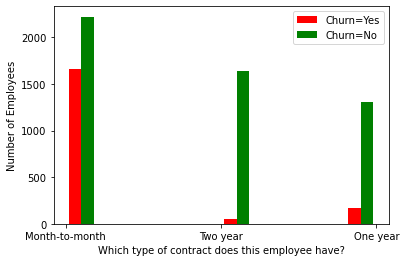

In [100]:
plt.hist([df_churn.Contract,df_retained.Contract],color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.xlabel('Which type of contract does this employee have?')
plt.ylabel('Number of Employees')
plt.legend()
plt.show()

In [101]:
df_Month_to_month=df[df.Contract=='Month-to-month']
df_One_year=df[df.Contract=='One year']
df_Two_year=df[df.Contract=='Two year']

In [102]:
df_Month_to_month_churn=df_Month_to_month[df_Month_to_month.Churn=='Yes']
df_Month_to_month_not_churn=df_Month_to_month[df_Month_to_month.Churn=='No']
df_One_year_churn=df_One_year[df_One_year.Churn=='Yes']
df_One_year_not_churn=df_One_year[df_One_year.Churn=='No']
df_Two_year_churn=df_Two_year[df_Two_year.Churn=='Yes']
df_Two_year_not_churn=df_Two_year[df_Two_year.Churn=='No']

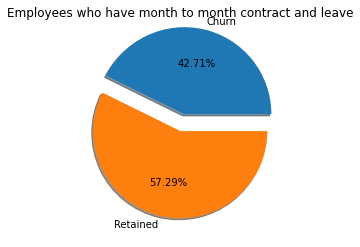

In [103]:
plt.pie([len(df_Month_to_month_churn),len(df_Month_to_month_not_churn)],labels=['Churn','Retained'],radius=1,
       autopct='%0.2f%%',shadow=True,explode=[0.2,0])
plt.title('Employees who have month to month contract and leave')
plt.show()

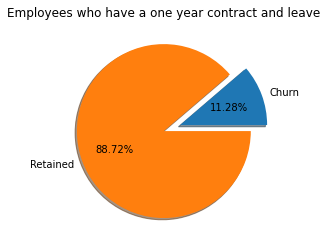

In [104]:
plt.pie([len(df_One_year_churn),len(df_One_year_not_churn)],labels=['Churn','Retained'],radius=1,
       autopct='%0.2f%%',shadow=True,explode=[0.2,0])
plt.title('Employees who have a one year contract and leave')
plt.show()

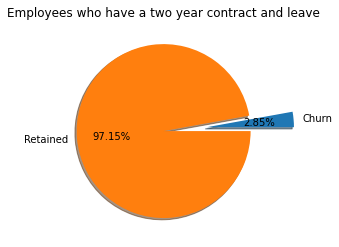

In [105]:
plt.pie([len(df_Two_year_churn),len(df_Two_year_not_churn)],labels=['Churn','Retained'],radius=1,
       autopct='%0.2f%%',shadow=True,explode=[0.5,0])
plt.title('Employees who have a two year contract and leave')
plt.show()

## Very clear from the charts above that a longer contract implies that the customer is very less likely to leave

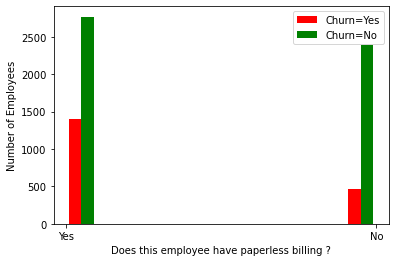

In [106]:
plt.hist([df_churn.PaperlessBilling,df_retained.PaperlessBilling],color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.xlabel('Does this employee have paperless billing ?')
plt.ylabel('Number of Employees')
plt.legend()
plt.show()

In [107]:
df_PaperlessBilling=df[df.PaperlessBilling=='Yes']
df_no_PaperlessBilling=df[df.PaperlessBilling=='No']

In [108]:
df_PaperlessBilling_churn=df_PaperlessBilling[df_PaperlessBilling.Churn=='Yes']
df_PaperlessBilling_not_churn=df_PaperlessBilling[df_PaperlessBilling.Churn=='No']
df_no_PaperlessBilling_churn=df_no_PaperlessBilling[df_no_PaperlessBilling.Churn=='Yes']
df_no_PaperlessBilling_not_churn=df_no_PaperlessBilling[df_no_PaperlessBilling.Churn=='No']

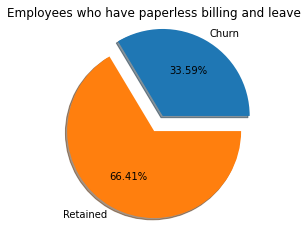

In [109]:
plt.pie([len(df_PaperlessBilling_churn),len(df_PaperlessBilling_not_churn)],labels=['Churn','Retained'],radius=1,
       autopct='%0.2f%%',shadow=True,explode=[0.2,0])
plt.title('Employees who have paperless billing and leave')
plt.show()

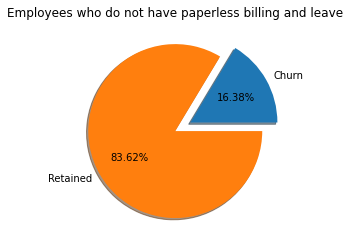

In [110]:
plt.pie([len(df_no_PaperlessBilling_churn),len(df_no_PaperlessBilling_not_churn)],labels=['Churn','Retained'],radius=1,
       autopct='%0.2f%%',shadow=True,explode=[0.2,0])
plt.title('Employees who do not have paperless billing and leave')
plt.show()

## The above charts indicate that employees who have paperless billing are more likely to leave

In [111]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

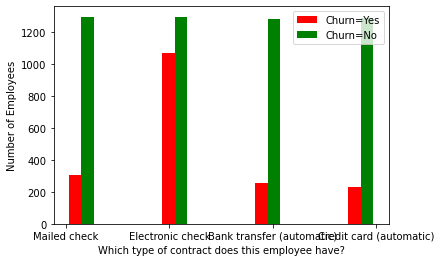

In [112]:
plt.hist([df_churn.PaymentMethod,df_retained.PaymentMethod],color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.xlabel('Which type of contract does this employee have?')
plt.ylabel('Number of Employees')
plt.legend()
plt.show()

## It is clear that employees with electronic payment method are more likely to leave

In [113]:
df.head(25)

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,0,No,No,34,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,No
2,0,No,No,2,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,0,No,No,45,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,No
4,0,No,No,2,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes
5,0,No,No,8,Fiber optic,No,No,Yes,No,Month-to-month,Yes,Electronic check,99.65,Yes
6,0,No,Yes,22,Fiber optic,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),89.10,No
7,0,No,No,10,DSL,Yes,No,No,No,Month-to-month,No,Mailed check,29.75,No
8,0,Yes,No,28,Fiber optic,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,Yes
9,0,No,Yes,62,DSL,Yes,Yes,No,No,One year,No,Bank transfer (automatic),56.15,No


In [114]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [115]:
df.shape

(7032, 14)

In [116]:
le=LabelEncoder()

In [117]:
df['Partner']=le.fit_transform(df['Partner'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['InternetService']=le.fit_transform(df['InternetService'])
df['OnlineSecurity']=le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup']=le.fit_transform(df['OnlineBackup'])
df['DeviceProtection']=le.fit_transform(df['DeviceProtection'])
df['TechSupport']=le.fit_transform(df['TechSupport'])
df['Contract']=le.fit_transform(df['Contract'])
df['PaperlessBilling']=le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']=le.fit_transform(df['PaymentMethod'])
df['Churn']=le.fit_transform(df['Churn'])

In [118]:
df.head(25)

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,0,1,0,0,2,0,0,0,1,2,29.85,0
1,0,0,0,34,0,2,0,2,0,1,0,3,56.95,0
2,0,0,0,2,0,2,2,0,0,0,1,3,53.85,1
3,0,0,0,45,0,2,0,2,2,1,0,0,42.30,0
4,0,0,0,2,1,0,0,0,0,0,1,2,70.70,1
5,0,0,0,8,1,0,0,2,0,0,1,2,99.65,1
6,0,0,1,22,1,0,2,0,0,0,1,1,89.10,0
7,0,0,0,10,0,2,0,0,0,0,0,3,29.75,0
8,0,1,0,28,1,0,0,2,2,0,1,2,104.80,1
9,0,0,1,62,0,2,2,0,0,1,0,0,56.15,0


In [119]:
df.tenure.max()

72

In [120]:
df.tenure.min()

1

In [121]:
44/71

0.6197183098591549

In [122]:
q1=df.MonthlyCharges.quantile(0.25)
q3=df.MonthlyCharges.quantile(0.75)

IQR=q3-q1

ul=df.MonthlyCharges.mean()+1.5*IQR
ll=df.MonthlyCharges.mean()-1.5*IQR

In [123]:
ul

146.21070819112632

In [124]:
ll

-16.614291808873674

In [125]:
IQR

54.275

In [126]:
df_out=df[(df.MonthlyCharges>ul) | (df.MonthlyCharges<ll)]
df_out

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn


## Great! our data does not have any outliers

In [127]:
mms=MinMaxScaler()

In [128]:
df

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,0,1,0,0,2,0,0,0,1,2,29.85,0
1,0,0,0,34,0,2,0,2,0,1,0,3,56.95,0
2,0,0,0,2,0,2,2,0,0,0,1,3,53.85,1
3,0,0,0,45,0,2,0,2,2,1,0,0,42.30,0
4,0,0,0,2,1,0,0,0,0,0,1,2,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,0,2,0,2,2,1,1,3,84.80,0
7039,0,1,1,72,1,0,2,2,0,1,1,1,103.20,0
7040,0,1,1,11,0,2,0,0,0,0,1,2,29.60,0
7041,1,1,0,4,1,0,0,0,0,0,1,3,74.40,1


In [129]:
df['tenure']=mms.fit_transform(df[['tenure']])
df['OnlineSecurity']=mms.fit_transform(df[['OnlineSecurity']])
df['OnlineBackup']=mms.fit_transform(df[['OnlineBackup']])
df['DeviceProtection']=mms.fit_transform(df[['DeviceProtection']])
df['TechSupport']=mms.fit_transform(df[['TechSupport']])
df['Contract']=mms.fit_transform(df[['Contract']])
df['PaymentMethod']=mms.fit_transform(df[['PaymentMethod']])
df['MonthlyCharges']=mms.fit_transform(df[['MonthlyCharges']])

In [130]:
df

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,0,0.000000,0,0.0,1.0,0.0,0.0,0.0,1,0.666667,0.115423,0
1,0,0,0,0.464789,0,1.0,0.0,1.0,0.0,0.5,0,1.000000,0.385075,0
2,0,0,0,0.014085,0,1.0,1.0,0.0,0.0,0.0,1,1.000000,0.354229,1
3,0,0,0,0.619718,0,1.0,0.0,1.0,1.0,0.5,0,0.000000,0.239303,0
4,0,0,0,0.014085,1,0.0,0.0,0.0,0.0,0.0,1,0.666667,0.521891,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0.323944,0,1.0,0.0,1.0,1.0,0.5,1,1.000000,0.662189,0
7039,0,1,1,1.000000,1,0.0,1.0,1.0,0.0,0.5,1,0.333333,0.845274,0
7040,0,1,1,0.140845,0,1.0,0.0,0.0,0.0,0.0,1,0.666667,0.112935,0
7041,1,1,0,0.042254,1,0.0,0.0,0.0,0.0,0.0,1,1.000000,0.558706,1


In [131]:
X=df.drop(['Churn'],axis='columns')
y=df.Churn

In [132]:
X_train,X_test,Y_train,Y_test=tts(X,y,test_size=0.25)

In [133]:
len(X_train)

5274

In [134]:
len(X_test)

1758

In [135]:
len(Y_train)

5274

In [136]:
len(Y_train[Y_train==1])

1417

In [137]:
len(Y_train[Y_train==0])

3857

In [138]:
sm=SMOTE(sampling_strategy='minority')

In [139]:
X_train_sm,Y_train_sm=sm.fit_resample(X_train,Y_train)
X_test_sm,Y_test_sm=sm.fit_resample(X_test,Y_test)

In [140]:
Y_train_sm.value_counts()

0    3857
1    3857
Name: Churn, dtype: int64

In [141]:
Y_test_sm.value_counts()

1    1306
0    1306
Name: Churn, dtype: int64

In [142]:
model=Sequential([Flatten(input_shape=(13,)),
                  Dense(64,activation='relu'),
                  Dropout(0.5),
                  Dense(64,activation='relu'),
                  Dropout(0.5),
                  Dense(16,activation='relu'),
                  Dense(16,activation='relu'),
                  Dense(1,activation='sigmoid')
                 ])
adam = Adam(learning_rate=0.005)
model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [143]:
model.fit(X_train_sm,Y_train_sm,epochs=500,batch_size=512)

Epoch 1/500
16/16 [==============================] - 2s 6ms/step - loss: 0.6393 - accuracy: 0.6318
Epoch 2/500
16/16 [==============================] - 0s 5ms/step - loss: 0.5460 - accuracy: 0.7355
Epoch 3/500
16/16 [==============================] - 0s 4ms/step - loss: 0.5244 - accuracy: 0.7506
Epoch 4/500
16/16 [==============================] - 0s 5ms/step - loss: 0.5133 - accuracy: 0.7582
Epoch 5/500
16/16 [==============================] - 0s 5ms/step - loss: 0.5087 - accuracy: 0.7590
Epoch 6/500
16/16 [==============================] - 0s 4ms/step - loss: 0.5018 - accuracy: 0.7635
Epoch 7/500
16/16 [==============================] - 0s 5ms/step - loss: 0.5037 - accuracy: 0.7600
Epoch 8/500
16/16 [==============================] - 0s 5ms/step - loss: 0.4979 - accuracy: 0.7628
Epoch 9/500
16/16 [==============================] - 0s 6ms/step - loss: 0.4926 - accuracy: 0.7667
Epoch 10/500
16/16 [==============================] - 0s 6ms/step - loss: 0.4956 - accuracy: 0.7624
Epoch 11/

16/16 [==============================] - 0s 5ms/step - loss: 0.4564 - accuracy: 0.7884
Epoch 84/500
16/16 [==============================] - 0s 4ms/step - loss: 0.4596 - accuracy: 0.7840
Epoch 85/500
16/16 [==============================] - 0s 4ms/step - loss: 0.4544 - accuracy: 0.7871
Epoch 86/500
16/16 [==============================] - 0s 5ms/step - loss: 0.4614 - accuracy: 0.7847
Epoch 87/500
16/16 [==============================] - 0s 8ms/step - loss: 0.4590 - accuracy: 0.7848
Epoch 88/500
16/16 [==============================] - 0s 8ms/step - loss: 0.4598 - accuracy: 0.7833
Epoch 89/500
16/16 [==============================] - 0s 8ms/step - loss: 0.4588 - accuracy: 0.7878
Epoch 90/500
16/16 [==============================] - 0s 5ms/step - loss: 0.4546 - accuracy: 0.7904
Epoch 91/500
16/16 [==============================] - 0s 5ms/step - loss: 0.4604 - accuracy: 0.7840
Epoch 92/500
16/16 [==============================] - 0s 7ms/step - loss: 0.4582 - accuracy: 0.7858
Epoch 93/500


16/16 [==============================] - 0s 5ms/step - loss: 0.4467 - accuracy: 0.7932
Epoch 165/500
16/16 [==============================] - 0s 5ms/step - loss: 0.4464 - accuracy: 0.7943
Epoch 166/500
16/16 [==============================] - 0s 5ms/step - loss: 0.4459 - accuracy: 0.7949
Epoch 167/500
16/16 [==============================] - 0s 5ms/step - loss: 0.4512 - accuracy: 0.7875
Epoch 168/500
16/16 [==============================] - 0s 5ms/step - loss: 0.4477 - accuracy: 0.7917
Epoch 169/500
16/16 [==============================] - 0s 5ms/step - loss: 0.4464 - accuracy: 0.7971
Epoch 170/500
16/16 [==============================] - 0s 6ms/step - loss: 0.4499 - accuracy: 0.7900
Epoch 171/500
16/16 [==============================] - 0s 5ms/step - loss: 0.4445 - accuracy: 0.7982
Epoch 172/500
16/16 [==============================] - 0s 5ms/step - loss: 0.4489 - accuracy: 0.7914
Epoch 173/500
16/16 [==============================] - 0s 6ms/step - loss: 0.4511 - accuracy: 0.7928
Epoc

16/16 [==============================] - 0s 6ms/step - loss: 0.4464 - accuracy: 0.7918
Epoch 246/500
16/16 [==============================] - 0s 6ms/step - loss: 0.4428 - accuracy: 0.7960
Epoch 247/500
16/16 [==============================] - 0s 6ms/step - loss: 0.4389 - accuracy: 0.7949
Epoch 248/500
16/16 [==============================] - 0s 7ms/step - loss: 0.4504 - accuracy: 0.7904
Epoch 249/500
16/16 [==============================] - 0s 6ms/step - loss: 0.4433 - accuracy: 0.7975
Epoch 250/500
16/16 [==============================] - 0s 7ms/step - loss: 0.4419 - accuracy: 0.7966
Epoch 251/500
16/16 [==============================] - 0s 6ms/step - loss: 0.4450 - accuracy: 0.7979
Epoch 252/500
16/16 [==============================] - 0s 7ms/step - loss: 0.4385 - accuracy: 0.7988
Epoch 253/500
16/16 [==============================] - 0s 7ms/step - loss: 0.4454 - accuracy: 0.7912
Epoch 254/500
16/16 [==============================] - 0s 7ms/step - loss: 0.4430 - accuracy: 0.7939
Epoc

16/16 [==============================] - 0s 6ms/step - loss: 0.4398 - accuracy: 0.8014
Epoch 327/500
16/16 [==============================] - 0s 4ms/step - loss: 0.4418 - accuracy: 0.7965
Epoch 328/500
16/16 [==============================] - 0s 5ms/step - loss: 0.4342 - accuracy: 0.7989
Epoch 329/500
16/16 [==============================] - 0s 5ms/step - loss: 0.4268 - accuracy: 0.8097
Epoch 330/500
16/16 [==============================] - 0s 5ms/step - loss: 0.4354 - accuracy: 0.8017
Epoch 331/500
16/16 [==============================] - 0s 5ms/step - loss: 0.4350 - accuracy: 0.7998
Epoch 332/500
16/16 [==============================] - 0s 5ms/step - loss: 0.4372 - accuracy: 0.8043
Epoch 333/500
16/16 [==============================] - 0s 5ms/step - loss: 0.4400 - accuracy: 0.7963
Epoch 334/500
16/16 [==============================] - 0s 5ms/step - loss: 0.4360 - accuracy: 0.8000
Epoch 335/500
16/16 [==============================] - 0s 5ms/step - loss: 0.4422 - accuracy: 0.7971
Epoc

16/16 [==============================] - 0s 5ms/step - loss: 0.4392 - accuracy: 0.7899
Epoch 408/500
16/16 [==============================] - 0s 6ms/step - loss: 0.4351 - accuracy: 0.8019
Epoch 409/500
16/16 [==============================] - 0s 5ms/step - loss: 0.4390 - accuracy: 0.7960
Epoch 410/500
16/16 [==============================] - 0s 6ms/step - loss: 0.4391 - accuracy: 0.7962
Epoch 411/500
16/16 [==============================] - 0s 6ms/step - loss: 0.4317 - accuracy: 0.8031
Epoch 412/500
16/16 [==============================] - 0s 7ms/step - loss: 0.4296 - accuracy: 0.8049
Epoch 413/500
16/16 [==============================] - 0s 7ms/step - loss: 0.4351 - accuracy: 0.7962
Epoch 414/500
16/16 [==============================] - 0s 6ms/step - loss: 0.4304 - accuracy: 0.8037
Epoch 415/500
16/16 [==============================] - 0s 7ms/step - loss: 0.4314 - accuracy: 0.8017
Epoch 416/500
16/16 [==============================] - 0s 7ms/step - loss: 0.4318 - accuracy: 0.8035
Epoc

16/16 [==============================] - 0s 6ms/step - loss: 0.4407 - accuracy: 0.7930
Epoch 489/500
16/16 [==============================] - 0s 5ms/step - loss: 0.4286 - accuracy: 0.8036
Epoch 490/500
16/16 [==============================] - 0s 5ms/step - loss: 0.4354 - accuracy: 0.8019
Epoch 491/500
16/16 [==============================] - 0s 5ms/step - loss: 0.4347 - accuracy: 0.8000
Epoch 492/500
16/16 [==============================] - 0s 6ms/step - loss: 0.4352 - accuracy: 0.8019
Epoch 493/500
16/16 [==============================] - 0s 5ms/step - loss: 0.4356 - accuracy: 0.7979
Epoch 494/500
16/16 [==============================] - 0s 5ms/step - loss: 0.4362 - accuracy: 0.7978
Epoch 495/500
16/16 [==============================] - 0s 6ms/step - loss: 0.4351 - accuracy: 0.7934
Epoch 496/500
16/16 [==============================] - 0s 6ms/step - loss: 0.4295 - accuracy: 0.8031
Epoch 497/500
16/16 [==============================] - 0s 7ms/step - loss: 0.4345 - accuracy: 0.8004
Epoc

In [144]:
model.evaluate(X_test_sm,Y_test_sm)

82/82 [==============================] - 1s 3ms/step - loss: 0.4893 - accuracy: 0.7768


[0.4893101155757904, 0.7767993807792664]

In [145]:
y_pred_temp=model.predict(X_test_sm)
y_pred_temp

82/82 [==============================] - 0s 1ms/step


array([[0.7345849 ],
       [0.1099743 ],
       [0.5891857 ],
       ...,
       [0.86974776],
       [0.7532194 ],
       [0.8700612 ]], dtype=float32)

In [146]:
Y_pred=[]

for element in y_pred_temp:
    if element>0.50:
        Y_pred.append(1)
    
    else:
        Y_pred.append(0)

In [147]:
print(classification_report(Y_test_sm,Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1306
           1       0.76      0.81      0.78      1306

    accuracy                           0.78      2612
   macro avg       0.78      0.78      0.78      2612
weighted avg       0.78      0.78      0.78      2612



<AxesSubplot:>

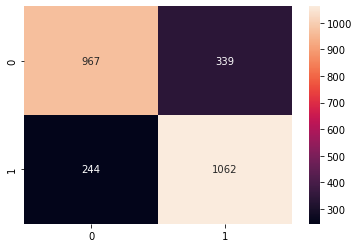

In [148]:
sn.heatmap(confusion_matrix(Y_test_sm,Y_pred),annot=True,fmt='d')

In [149]:
model.save('tf_model.h5')

In [150]:
mms.data_max_

array([118.75])

In [151]:
mms.data_min_

array([18.25])

In [152]:
mms.data_range_

array([100.5])

In [153]:
(29.85-18.25)/100.5

0.11542288557213931

In [154]:
tf_model = keras.models.load_model("tf_model.h5")

In [155]:
tf_model.evaluate(X_test_sm,Y_test_sm)

82/82 [==============================] - 0s 2ms/step - loss: 0.4893 - accuracy: 0.7768


[0.4893101155757904, 0.7767993807792664]